In [1]:
pip install ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ipynb.fs.defs import task1
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, r_regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, mean_squared_error, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans

In [2]:
# Load task 3.1 model
with open('3_1.pkl', 'rb') as f:
    clf_3_1 = pickle.load(f)

In [9]:
# Load the dataset
x_train, y_train, x_test, y_test = task1.load_data()

In [10]:
# Normalise
mms = MinMaxScaler(feature_range=(0, 1))
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test) # normalize the testing data before testing. Note that we use the model fit using the training data

In [11]:
# Extract PCA components
pca = PCA(n_components=2)
pca.fit(x_train_norm)
pca_feature = pca.transform(x_train_norm)

In [13]:
km = KMeans(n_clusters=10) # Class count
y = km.fit_transform(pca_feature)
y_kmeans = km.predict(pca_feature)

E:\Program Files\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


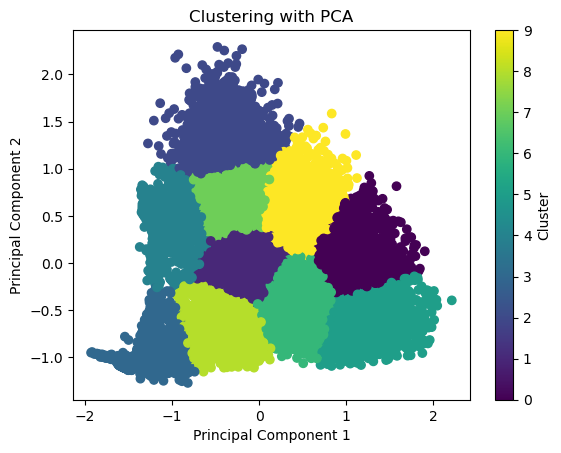

In [14]:
# Visualize the clustering results
plt.scatter(pca_feature[:, 0], pca_feature[:, 1], c=y_kmeans, cmap='viridis')
plt.title('Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

ii) In the current 2D scatter plot, each point has two coordinates corresponding to the first two principal components. If a third PCA component is added, each point will have a third coordinate. This means that the points will be distributed in three-dimensional space.